## Background:

Telecom XYZ's Marketing Division has a budget constraint for promoting a new consumer offer. They've requested the Customer Value Management (CVM) team to strategically drive the promotion.

## Current Situation:

The CVM team tested the offer on a random sample of 2,240 customers.

## Objective:

As the Machine Learning Manager, develop a machine learning model using the experiment results to identify the most receptive customers from the full customer database for the new offer. This will enable the team to maximize campaign effectiveness by targeting the most likely customers to adopt the offer and optimize marketing spend by focusing on a high-potential segment.

## Dataset Attributes: 
- 1. Id : Customer’s unique identifier
- 2. Year_birth: Customer’s birth year
- 3. Consumer_seg:  Market segment fo Customer
- 4. Region: Customer’s geographical location
- 5. Cltv: Customer lifetime Value 
- 6. Activation_dt:  Date customer joined the Telco Operator
- 7. Recency: Number of days since last purchase.
- 8. Device_type : Smartphone or Non Smartphone flag
- 9. Data_rev_6mths: Data Revenue in last 6 months.
- 10. Voice_rev_6mths: Voice Revenue in last 6 months 
- 11. Tot_rev_6mths: Total Revenue in last 6 months .
- 12. Total_purchases: Total purchase count of all products in the last 6 months 
- 13. Total_engagements: Count of engagements across all channels whether offer was suuscessfully purchased on not
- 14. Digital_channel_purchases: Count of purchases done via digital channels 
- 15. Ussd_channel_purchases: Count of purchases done via USSD Channel
- 16. Other_channels_purchases: Count of purchases done via Other Channels
- 17. PrevResponseCnt : Count of responses for previous promotional campaign.
- 18. Complaint_cnt: Count of previous complaints 
- 19. Response(Target Label) : Purchase or Not based on the new offer 


###### I choose Random Forest because of it a versatile and powerful algorithm that is commonly used for classification tasks due to its ability to handle various data types, robustness to overfitting, and interpretability through feature importance analysis.




In [1]:
#importing the necessary pyhton libraries for model development.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings as ws
ws.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,confusion_matrix, roc_curve, auc, precision_recall_curve


In [2]:
# Load the dataset
data = pd.read_csv("MachineLearningManagerDataset.csv")
data.head()

,id,year_birth,consumer_seg,region,cltv,activation_dt,recency,device_type,data_rev_6mths,voice_rev_6mths,tot_rev_6mths,total_purchases,total_engagements,digital_channel_purchases,ussd_channel_purchases,other_channels_purchases,PrevResponseCnt,complaint_cnt,response
0,11110,1973,Youth Seg,West,3502.0,2013-04-13,56,Non Smartphone,3,1,5,0,14,0,0,0,0,0,0
1,3955,1965,Youth Seg,East,4861.0,2014-06-22,20,Smartphone,3,2,6,0,14,0,0,0,0,0,0
2,5555,1975,Youth Seg,East,153924.0,2014-02-07,81,Smartphone,2,3,6,0,0,0,0,0,0,0,0
3,6862,1971,Youth Seg,East,1730.0,2014-05-18,65,Smartphone,2,5,8,0,20,0,0,0,0,0,0
4,11181,1949,HV seg,North,156924.0,2013-08-29,85,Smartphone,3,4,8,0,0,0,0,0,0,0,0


In [3]:
# So we have 2,240 rows and 19 columns as seen in the question.
data.shape

(2240, 19)

In [4]:
# Exploring the dataset (EDA), cltv has missing values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         2240 non-null   int64  
 1   year_birth                 2240 non-null   int64  
 2   consumer_seg               2240 non-null   object 
 3   region                     2240 non-null   object 
 4   cltv                       2216 non-null   float64
 5   activation_dt              2240 non-null   object 
 6   recency                    2240 non-null   int64  
 7   device_type                2240 non-null   object 
 8   data_rev_6mths             2240 non-null   int64  
 9   voice_rev_6mths            2240 non-null   int64  
 10  tot_rev_6mths              2240 non-null   int64  
 11  total_purchases            2240 non-null   int64  
 12  total_engagements          2240 non-null   int64  
 13  digital_channel_purchases  2240 non-null   int64

In [5]:
# Fill missing values in 'cltv' with the mean value
data['cltv'].fillna(data['cltv'].mean(), inplace=True)

In [6]:
# Drop unnecessary columns
data.drop(columns=['activation_dt'], inplace=True)

In [7]:
# Handle missing values if any is present
data.dropna(inplace=True)

In [8]:
# Encode categorical variables
label_encoders = {}
for column in ['consumer_seg', 'region', 'device_type']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [9]:
# Define Min-Max Scaler
scaler = MinMaxScaler()

# Scale numerical features
numerical_columns = ['cltv', 'recency', 'data_rev_6mths', 'voice_rev_6mths',
                     'tot_rev_6mths', 'total_purchases', 'total_engagements',
                     'digital_channel_purchases', 'ussd_channel_purchases',
                     'other_channels_purchases', 'PrevResponseCnt', 'complaint_cnt']

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [10]:
# Defining the features and target variable
X = data.drop(columns=['response'])
y = data['response']

In [11]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#One effective approach is to use a Voting Classifier that combines predictions from multiple base estimators 
#(individual models) to achieve better overall performance. 
#Here's how you can implement this using the RandomForestClassifier and GradientBoostingClassifier as base estimators:
# Define base estimators

rf_estimator = RandomForestClassifier(random_state=42)
gb_estimator = GradientBoostingClassifier(random_state=42)

In [13]:
# Create the Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('Random Forest', rf_estimator),
    ('Gradient Boosting', gb_estimator)
], voting='soft')  # 'soft' voting takes into account the predicted probabilities

In [14]:
#Train the Voting Classifier
best_model = voting_classifier.fit(X_train, y_train)

In [15]:
# Predicting probabilities of response to the new offer
response_probabilities = best_model.predict_proba(X)

In [16]:
# Combine probabilities with customer IDs
customer_response_df = pd.DataFrame({'Customer_ID': data['id'], 'Response_Probability': response_probabilities[:, 1]})

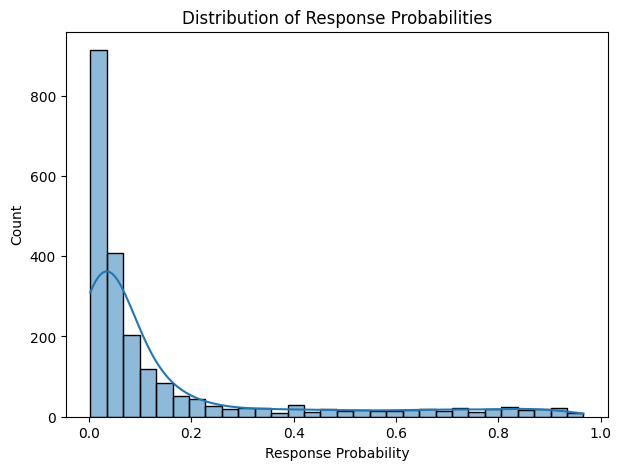

In [17]:
# Visualizing the distribution of response probabilities and we can see that from 50% is reasonable
plt.figure(figsize=(7, 5))
sns.histplot(customer_response_df['Response_Probability'], bins=30, kde=True)
plt.title('Distribution of Response Probabilities')
plt.xlabel('Response Probability')
plt.ylabel('Count')
plt.show()

In [18]:
# Calculating the percentage of most receptive customers relative to the entire dataset
total_customers = len(customer_response_df)

#considering those with probability >= 0.5 as most receptive
most_receptive_count = (customer_response_df['Response_Probability'] >= 0.5).sum() 
percentage_most_receptive = (most_receptive_count / total_customers) * 100

In [19]:
# Count of Most Receptive Customers to the total base meaning 13% of the base are Most Receptive Customers 
print("Count of Most Receptive Customers:", most_receptive_count)
print("Total Base:", len(customer_response_df))
print("Percentage of Most Receptive Customers :",round(most_receptive_count/len(customer_response_df) * 100, 2))

Count of Most Receptive Customers: 255
Total Base: 2240
Percentage of Most Receptive Customers : 11.38


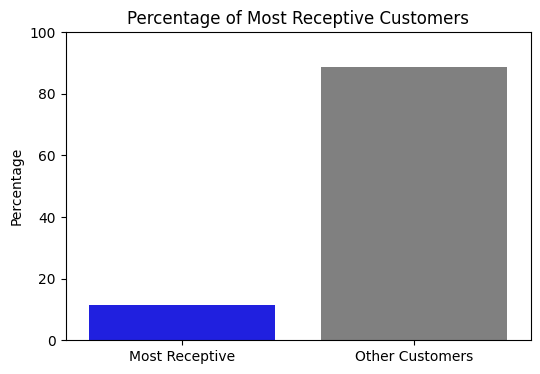

In [20]:
# Plot of the percentage of most receptive customers relative to the entire dataset
categories = ['Most Receptive', 'Other Customers']
percentages = [percentage_most_receptive, 100 - percentage_most_receptive]

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=categories, y=percentages, palette=['blue', 'gray'])
plt.title('Percentage of Most Receptive Customers')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.show()

In [21]:
# Evaluate model performance
y_pred_voting = voting_classifier.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)
roc_auc_voting = roc_auc_score(y_test, y_pred_voting)

# Display model performance metrics
print("Voting Classifier Performance Metrics:")
print("Accuracy:", round(accuracy_voting, 2))
print("Precision:", round(precision_voting, 2))
print("Recall:", round(recall_voting, 2))
print("F1 Score:", round(f1_voting, 2))
print("ROC AUC Score:", round(roc_auc_voting, 2))

Voting Classifier Performance Metrics:
Accuracy: 0.9
Precision: 0.65
Recall: 0.29
F1 Score: 0.4
ROC AUC Score: 0.63


**Accuracy** measures the overall correctness of the model's predictions. 
However, accuracy can be misleading, especially in imbalanced datasets where one class dominates the other.

**Precision** measures the proportion of correctly predicted positive instances among all instances predicted as positive.

**Recall (also known as sensitivity)** measures the proportion of correctly predicted positive instances among all actual positive instances.

**The F1 score** is the harmonic mean of precision and recall, providing a balance between the two metrics. It ranges from 0 to 1, where higher values indicate better model performance.

**The ROC AUC (Receiver Operating Characteristic Area Under the Curve)** score measures the area under the ROC curve, which represents the model's ability to distinguish between positive and negative classes.

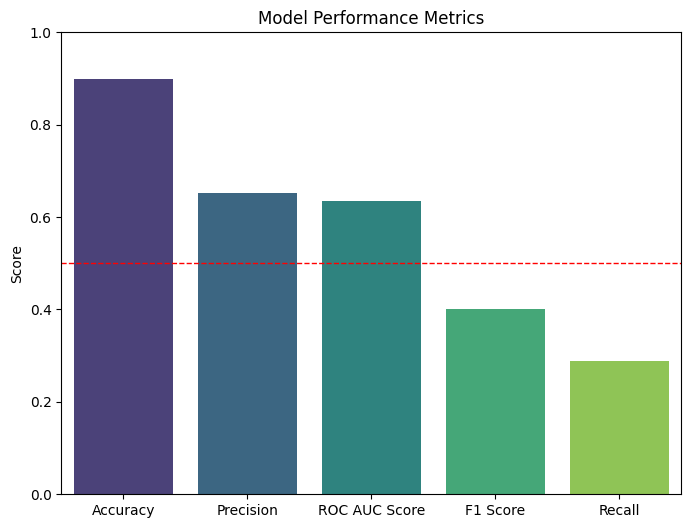

In [22]:
# Define model performance metrics
metrics = ['Accuracy', 'Precision','ROC AUC Score','F1 Score','Recall' ]
scores = [accuracy_voting,  precision_voting, roc_auc_voting, f1_voting, recall_voting]

# Plot the model performance metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)

# Add a line at y=0.5 for reference
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=1)
plt.show()

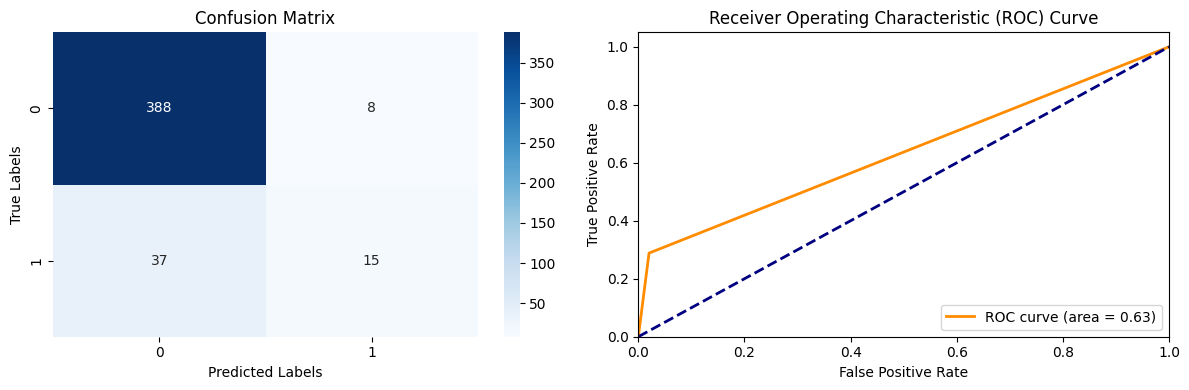

In [23]:
# 2. Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_voting)

# 3. Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_voting)
roc_auc = auc(fpr, tpr)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True,  cmap='Blues', fmt='g', cbar=True, ax=axes[0])
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')
axes[0].set_title('Confusion Matrix')

# Plot ROC curve
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

In [24]:
# Save the most receptive customers as CSV that is customers who there Response_Probability greater or equal 50 %
most_receptive_customers = customer_response_df[customer_response_df['Response_Probability'] >= 0.5]
most_receptive_customers.to_csv("most_receptive_customers.csv", index=False)
print("Most Receptive Customers saved to most_receptive_customers.csv")

Most Receptive Customers saved to most_receptive_customers.csv


## Conclusion

* This predictive machine learning model is uesd to identify receptive customers for a new offer. Leveraging various customer attributes, including segment, location, and purchase history

- Finally, the output it can be used to target high-potential segments, optimize marketing spend, and enhance campaign effectiveness. This data-driven approach enables personalized marketing strategies, driving business growth and maximizing return on investment.